<a href="https://colab.research.google.com/github/xxl5455/DS440/blob/main/DS440Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creating the modeling dataset
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

# evaluate xgboost random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier

In [ ]:
# Function to create a confusion matrix
def conf_matrix(y_test, pred_test):
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

def class_weight(labels_dict,mu=0.15):
    total = sum(labels_dict.values())
    keys = labels_dict.keys()
    weights = dict()
    for i in keys:
        score = np.log((mu*total)/float(labels_dict[i]))
        weights[i] = score if score > 1 else 1
    return weights

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('/content/drive/My Drive/DS440/cleaned-stroke-data.csv')
df = df[df['gender'] != 'Other']

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['smoking_status', 'work_type'])

In [ ]:
df2 = one_hot_encoded_data
df2['gender'] = df2['gender'].replace({'Male': 1, 'Female': 0})
df2['ever_married'] = df2['ever_married'].replace({'Yes': 1, 'No': 0})
df2['Residence_type'] = df2['Residence_type'].replace({'Urban': 1, 'Rural': 0})
df2

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67,0,1,1,1,228.69,36.6,1,1,0,0,0,0,1,0,0
1,31112,1,80,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0
2,60182,0,49,0,0,1,1,171.23,34.4,1,0,0,1,0,0,1,0,0
3,1665,0,79,1,0,1,0,174.12,24.0,1,0,1,0,0,0,0,1,0
4,56669,1,81,0,0,1,1,186.21,29.0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,68398,1,82,1,0,1,0,71.97,28.3,0,0,1,0,0,0,0,1,0
3422,45010,0,57,0,0,1,0,77.93,21.7,0,0,1,0,0,0,1,0,0
3423,44873,0,81,0,0,1,1,125.20,40.0,0,0,1,0,0,0,0,1,0
3424,19723,0,35,0,0,1,0,82.99,30.6,0,0,1,0,0,0,0,1,0


In [ ]:
StrokeNum = df2.groupby(['stroke'])['stroke'].count()
print(StrokeNum)

stroke
0    3245
1     180
Name: stroke, dtype: int64


## SPLITTING DATA

In [ ]:
X = df2.drop(columns='stroke', axis=1)
y = df2['stroke']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 2740
The number of records in the test dataset is 685
The training dataset has 2604 records for the majority class and 136 records for the minority class.


In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(df2, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

KeyError: ignored

## TRAIN LR MODER ON IMBALANCED DATA

In [ ]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train)

predictions0 = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions0))
from sklearn.metrics import recall_score,precision_score,f1_score
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions0)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions0)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions0)
print('F1 score: %f' % f1)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       641
           1       0.00      0.00      0.00        44

    accuracy                           0.94       685
   macro avg       0.47      0.50      0.48       685
weighted avg       0.88      0.94      0.90       685

Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
labels_dict = y.value_counts().to_dict()
weights = class_weight(labels_dict)
zero = 1 - best_weight
# logistic regression object
lr_cw = LogisticRegression(solver='newton-cg', class_weight={0: zero, 1: best_weight})

# train the model on train set
lr_cw.fit(X_train, y_train)

predictions_cw = lr_cw.predict(X_test)

# print classification report
print(classification_report(y_test, predictions_cw))
from sklearn.metrics import recall_score,precision_score,f1_score
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_cw)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_cw)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_cw)
print('F1 score: %f' % f1)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


              precision    recall  f1-score   support

           0       0.96      0.85      0.90       641
           1       0.18      0.50      0.27        44

    accuracy                           0.82       685
   macro avg       0.57      0.67      0.58       685
weighted avg       0.91      0.82      0.86       685

Precision: 0.181818
Recall: 0.500000
F1 score: 0.266667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

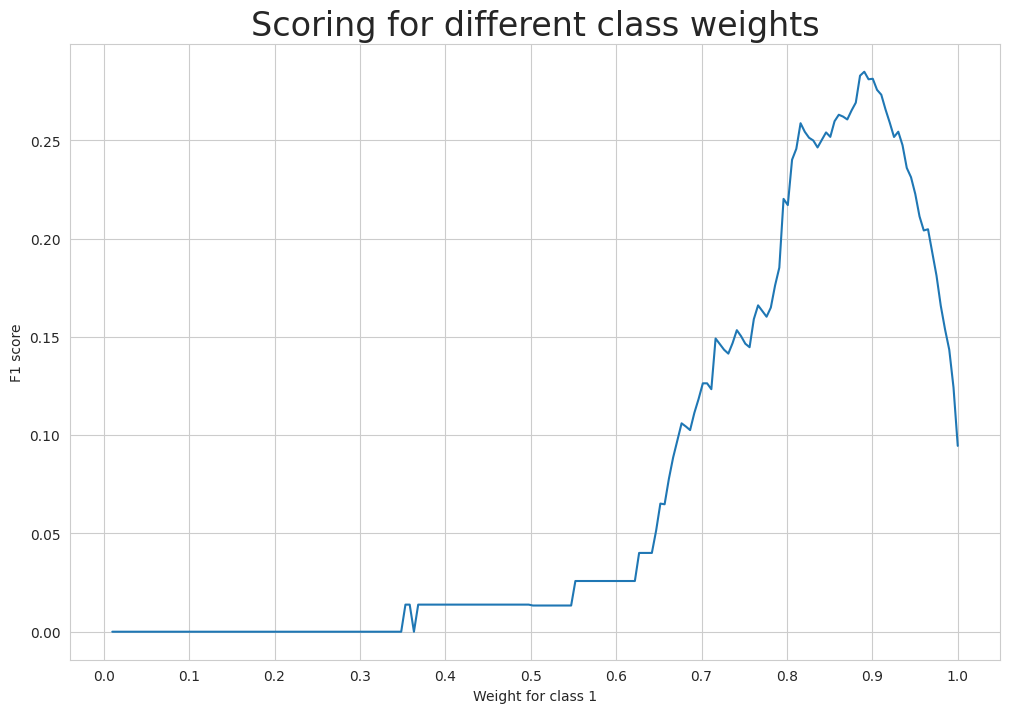

In [ ]:
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr,
                          param_grid= param_grid,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(X_train, y_train)

# Corrected lineplot
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
weigh_data = pd.DataFrame({'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1 - weights)})
sns.lineplot(x=weigh_data['weight'], y=weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10, 1) for i in range(0, 11, 1)])
plt.title('Scoring for different class weights', fontsize=24)


In [ ]:
# Finding the x value that produces the highest F1 score
best_weight_index = np.argmax(weigh_data['score'])
best_weight = weigh_data['weight'][best_weight_index]
best_f1_score = weigh_data['score'][best_weight_index]

# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_cw)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_cw)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_cw)
print('F1 score: %f' % f1)

f1_test = f1_score(y_test, predictions0)

print(f"Primary F1 score: {f1_test}")
print(f"Best weight for class 1: {best_weight}")
print(f"Highest F1 score: {best_f1_score}")



Precision: 0.181818
Recall: 0.500000
F1 score: 0.266667
Primary F1 score: 0.0
Best weight for class 1: 0.8905527638190954
Highest F1 score: 0.2849463086147348


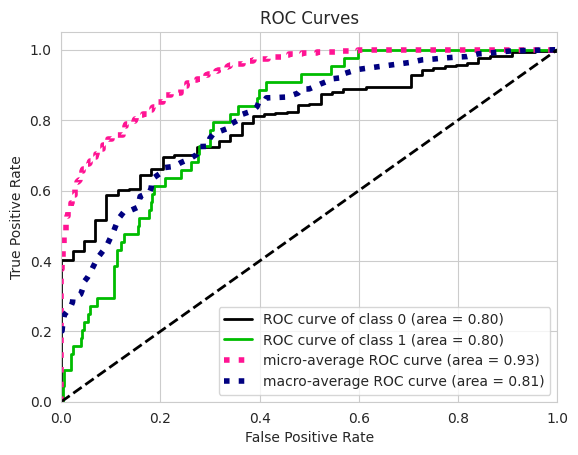

In [ ]:
cw_y_proba = lr_cw.predict_proba(X=X_test)
plot = skplt.metrics.plot_roc(y_test, cw_y_proba)
auc = roc_auc_score(y_test, cw_y_proba[:,1])

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions0)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
plot_roc_curve(y_test, predictions_cw)
print(f'model 1 AUC score: {roc_auc_score(y_test, predictions_cw)}')

## random over sampling

In [ ]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.911


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('F1 Score: %.3f' % score)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('AUC: %.3f' % auc)【'
print('Confusion Matrix:')
print(confusion)

F1 Score: 0.911
Precision: 0.162
Recall: 0.136
AUC: 0.544
Confusion Matrix:
[[610  31]
 [ 38   6]]


## One-Class Support Vector Machines

In [ ]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# generate dataset
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model_svm = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model_svm.fit(trainX)
# detect outliers in the test set
yhat = model_svm.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)


F1 Score: 0.042


In [ ]:
# isolation forest for imbalanced classification
from sklearn.ensemble import IsolationForest
model_iso = IsolationForest(contamination=0.01, behaviour='new')
# fit on majority class
trainX = trainX[trainy==0]
model_iso.fit(trainX)
# detect outliers in the test set
yhat = model_iso.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

TypeError: ignored

## DO OVERSAMPLING

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 136
Before OverSampling, counts of label '0': 2604 

After OverSampling, the shape of train_X: (5208, 17)
After OverSampling, the shape of train_y: (5208,) 

After OverSampling, counts of label '1': 2604
After OverSampling, counts of label '0': 2604


In [ ]:
## Random Over-Sampling With imblearn
import imblearn
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 2604, 1: 136})
Resample dataset shape Counter({0: 2604, 1: 2604})


In [ ]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_test, y_test, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.887


In [ ]:
## RANDOM OVERSAMPLE TO WHOLE DATASET
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_over, y_over, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.911


In [ ]:
## RANDOM OVERSAMPLE TO TRAINING DATA
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

In [ ]:
Xover_train, Xover_test, yover_train, yover_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

## TRAIN LR MODEL ON BALANED DATA

In [ ]:
# Apply LR on balanced data
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

from sklearn.metrics import recall_score,precision_score,f1_score
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

NameError: ignored

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

In [ ]:
# Apply LR on balanced data
lr2 = LogisticRegression()
lr2.fit(X_ros, y_ros)
predictions2 = lr2.predict(X_test)

# print classification report
print(classification_report(y_test, predictions2))
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions2)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions2)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions2)
print('F1 score: %f' % f1)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr,
                          param_grid= param_grid,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(X_train_res, y_train_res)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
# Balanced data on Balanced model accuracy
TrainAccuracy_LR = accuracy_score(y_train_res, lr1.predict(X_train_res))
TestAccuracy_LR = accuracy_score(y_test, predictions)
print('Accuracy on Training data : ', TrainAccuracy_LR)
print('Accuracy on Testing data : ', TestAccuracy_LR)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions0)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

The Confusion Matrix created has four different quadrants:

True Negative (Top-Left Quadrant)

False Positive (Top-Right Quadrant)

False Negative (Bottom-Left Quadrant)

True Positive (Bottom-Right Quadrant)

True means that the values were accurately predicted, False means that there was an error or wrong prediction.

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt
lr_y_proba = lr1.predict_proba(X=X_test)
plot = skplt.metrics.plot_roc(y_test, xgb_y_proba)
auc = roc_auc_score(y_test, xgb_y_proba[:,1])

## TRAIN XGBOOST MODEL

In [ ]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train_res, y_train_res)
# make predictions
preds_xgb = bst.predict(X_test)

# print classification report
print(classification_report(y_test, preds_xgb))

# precision tp / (tp + fp)
precision = precision_score(y_test, preds_xgb)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds_xgb)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, preds_xgb)
print('F1 score: %f' % f1)

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       641
           1       0.17      0.75      0.28        44

    accuracy                           0.75       685
   macro avg       0.57      0.75      0.56       685
weighted avg       0.93      0.75      0.81       685

Precision: 0.169231
Recall: 0.750000
F1 score: 0.276151


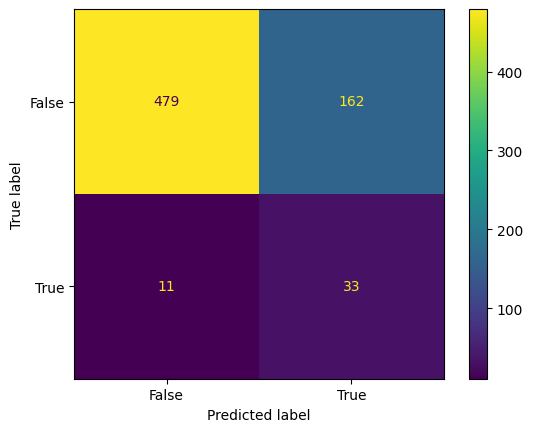

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, preds_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

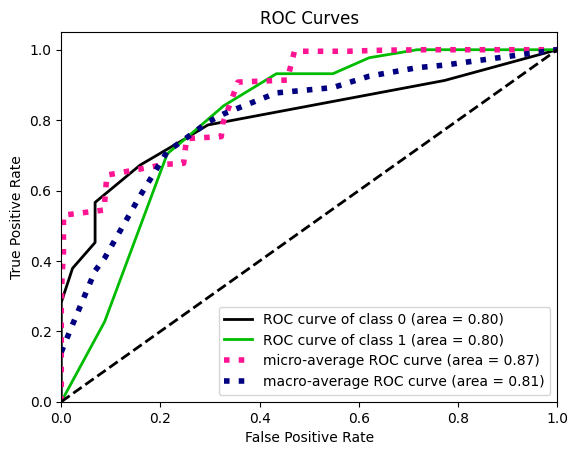

In [ ]:
xgb_y_proba = bst.predict_proba(X=X_test)
plot = skplt.metrics.plot_roc(y_test, xgb_y_proba)
auc = roc_auc_score(y_test, xgb_y_proba[:,1])

## TRAIN RANDOM FOREST MODEL

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

#Build SRF model
BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=2)
#Create Stratified K-fold cross validation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scoring = ('f1', 'recall', 'precision')
# #Evaluate BRFC model
# scores = cross_validate(BRFC, X, y, scoring=scoring, cv=cv)
# #Get average evaluation metrics
# print('Mean f1: %.3f' % mean(scores['test_f1']))
# print('Mean recall: %.3f' % mean(scores['test_recall']))
# print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train BRFC
BRFC.fit(X_train, y_train)
#BRFC prediction result
pred_BRFC = BRFC.predict(X_test)
# print classification report
print(classification_report(y_test, pred_BRFC))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

              precision    recall  f1-score   support

           0       0.98      0.71      0.82       641
           1       0.15      0.75      0.25        44

    accuracy                           0.71       685
   macro avg       0.56      0.73      0.54       685
weighted avg       0.92      0.71      0.79       685



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_BRFC)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_BRFC)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_BRFC)
print('F1 score: %f' % f1)

Precision: 0.150685
Recall: 0.750000
F1 score: 0.250951


In [ ]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):

    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)

    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index:
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1

    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1

    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test function

calc_precision_recall(y_test, pred_BRFC)

(0.1506849315068493, 0.75)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


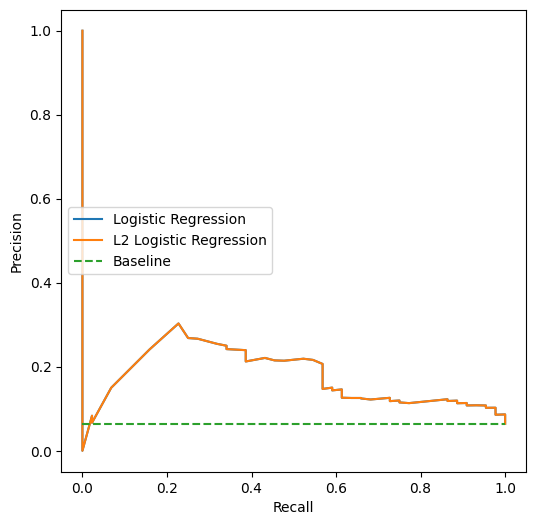

In [ ]:
lr = LogisticRegression(max_iter=10000, penalty='none')
lr.fit(X_train_res, y_train_res)
y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
precision_scores = []
recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:

    y_test_preds = []

    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)

    precision, recall = calc_precision_recall(y_test, y_test_preds)

    precision_scores.append(precision)
    recall_scores.append(recall)

  # Fit and predict test class probabilities
lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
lr_l2.fit(X_train_res, y_train_res)
y_test_probs = lr_l2.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
l2_precision_scores = []
l2_recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:

    y_test_preds = []

    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)

    precision, recall = calc_precision_recall(y_test, y_test_preds)

    l2_precision_scores.append(precision)
    l2_recall_scores.append(recall)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall_scores, precision_scores, label='Logistic Regression')
ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

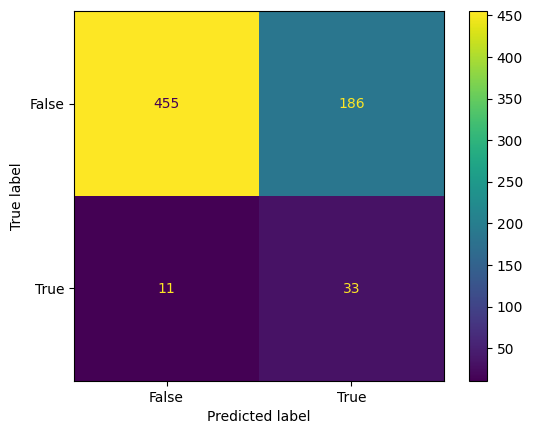

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_BRFC)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
pred_rf = rf.predict(X_test)

# print classification report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       641
           1       0.12      0.02      0.04        44

    accuracy                           0.93       685
   macro avg       0.53      0.51      0.50       685
weighted avg       0.88      0.93      0.90       685



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_rf)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_rf)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_rf)
print('F1 score: %f' % f1)

Precision: 0.125000
Recall: 0.022727
F1 score: 0.038462


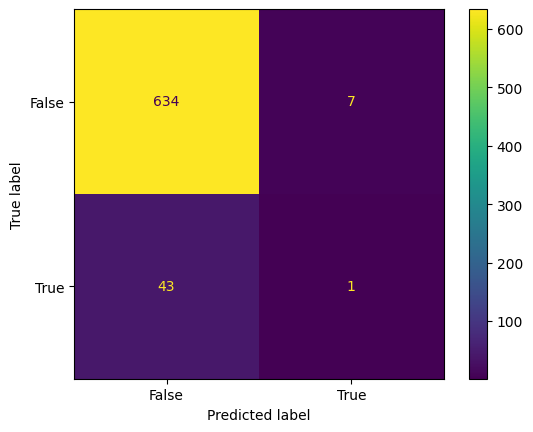

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

model 1 AUC score: 0.8837753510140406


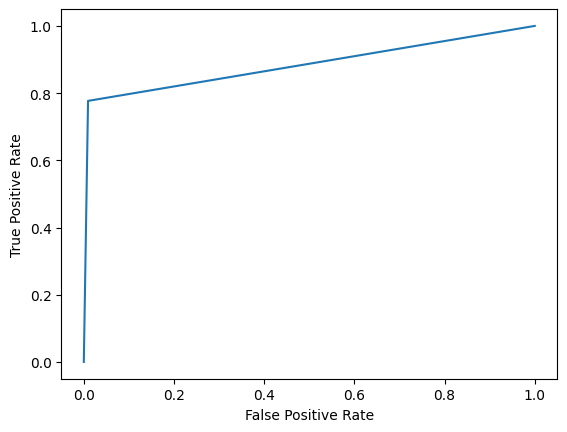

In [ ]:
plot_roc_curve(y_test_res, pred_rf)
print(f'model 1 AUC score: {roc_auc_score(y_test_res, pred_rf)}')

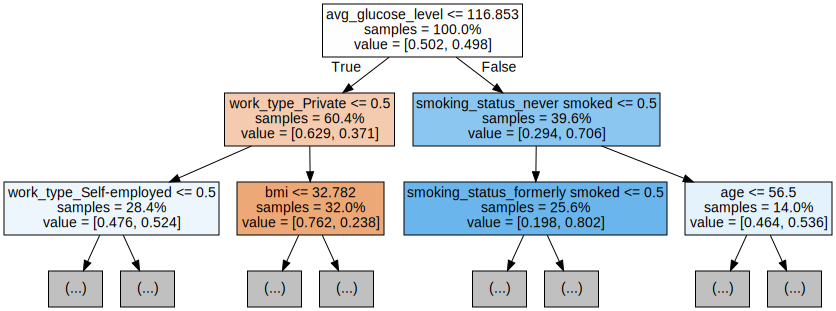

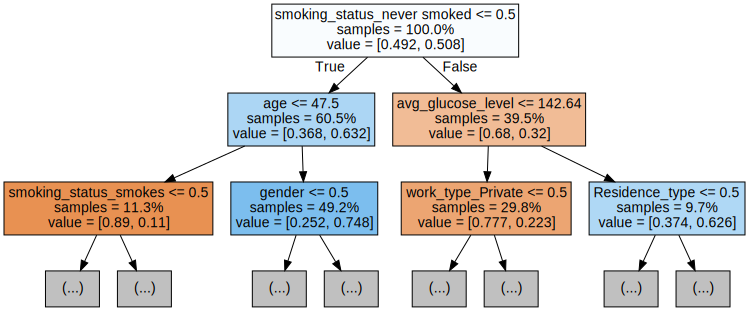

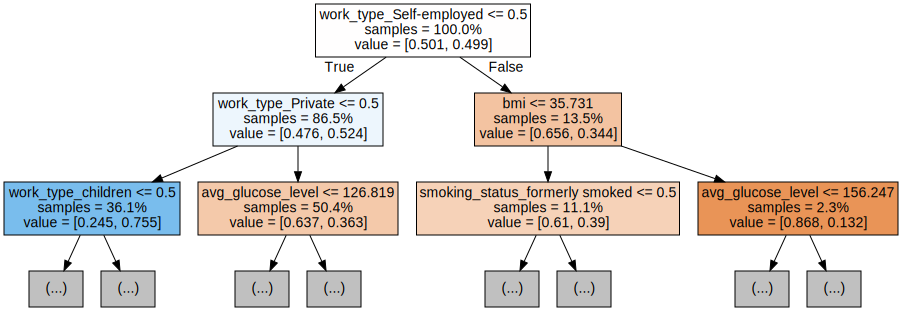

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_res.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

# Compute class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Define the best hyperparameters based on the grid search results
best_rf_params = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'class_weight': class_weight_dict,
    'random_state': 42
}

# Create a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_rf_params)

# Fit the model on the resampled training data
best_rf_classifier.fit(X_train_res, y_train_res)

# Make predictions on the test data
predictions_rf = best_rf_classifier.predict(X_test)

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, predictions_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       641
           1       0.00      0.00      0.00        44

    accuracy                           0.93       685
   macro avg       0.47      0.50      0.48       685
weighted avg       0.88      0.93      0.90       685



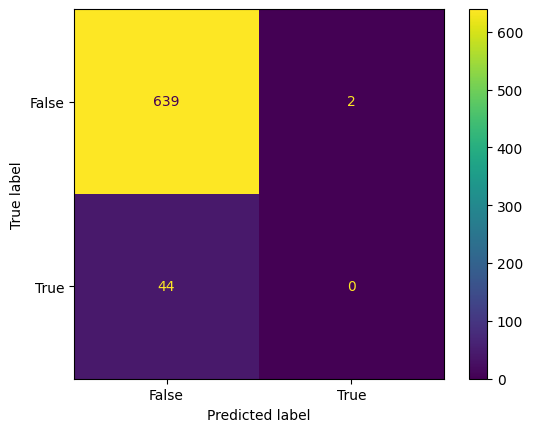

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
plot_roc_curve(y, predictions_rf)
print(f'model 1 AUC score: {roc_auc_score(y, predictions_rf)}')

ValueError: ignored

In [ ]:
# Compute class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Define the best hyperparameters based on the grid search results
best_rf_params = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'class_weight': class_weight_dict,
    'random_state': 42
}

# Create a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_rf_params)

# Fit the model on the resampled training data
best_rf_classifier.fit(X_train_res, y_train_res)

# Make predictions on the test data
predictions_rf = best_rf_classifier.predict(X_test)

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, predictions_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       641
           1       0.00      0.00      0.00        44

    accuracy                           0.93       685
   macro avg       0.47      0.50      0.48       685
weighted avg       0.88      0.93      0.90       685



In [ ]:
TrainAccuracy_RF = accuracy_score(y_train_res, best_rf_classifier.predict(X_train_res))
TestAccuracy_RF = accuracy_score(y_test, predictions_rf)
print('Accuracy on Training data : ', TrainAccuracy_RF)
print('Accuracy on Testing data : ', TestAccuracy_RF)

Accuracy on Training data :  1.0
Accuracy on Testing data :  0.9328467153284672


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create and fit the XGBoost model
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, objective='binary:logistic', random_state=42)
xgb_classifier.fit(X_train_res, y_train_res)

# Make probability predictions instead of class predictions
probs_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

# Adjust the threshold (you can experiment with different values)
threshold_xgb = 0.3  # Adjust this threshold as needed

# Convert probability predictions to class predictions based on the threshold
predictions_xgb_adjusted = (probs_xgb > threshold_xgb).astype(int)

# Print classification report for adjusted threshold
print("Classification Report for XGBoost:")
print(classification_report(y_test, predictions_xgb_adjusted))

# Calculate accuracy on training data
X_train_prediction_XGB = xgb_classifier.predict(X_train_res)
training_data_accuracy_XGB = accuracy_score(X_train_prediction_XGB, y_train_res)
print('Accuracy on Training data (XGBoost): ', training_data_accuracy_XGB)
TestAccuracy_XGB = accuracy_score(y_test, predictions_xgb_adjusted)
print('Accuracy on Testing data : ', TestAccuracy_XGB)

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       641
           1       0.17      0.41      0.24        44

    accuracy                           0.84       685
   macro avg       0.57      0.64      0.58       685
weighted avg       0.91      0.84      0.87       685

Accuracy on Training data (XGBoost):  0.9427803379416283
Accuracy on Testing data :  0.8379562043795621


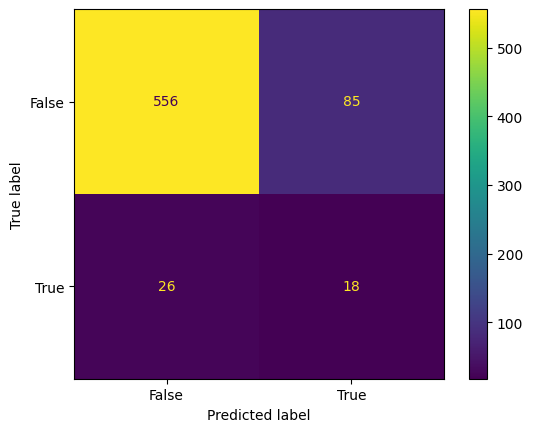

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions_xgb_adjusted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

model 1 AUC score: 0.6382428024393704


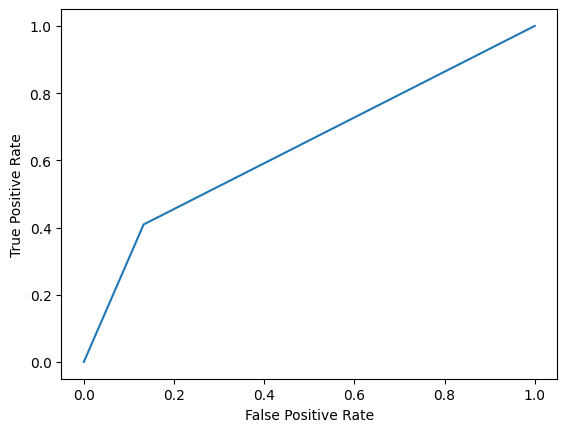

In [ ]:
plot_roc_curve(y_test, predictions_xgb_adjusted)
print(f'model 1 AUC score: {roc_auc_score(y_test, predictions_xgb_adjusted)}')

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train_res, y_train_res)
# X_test = X_test.values
y_pred_nb = clf_nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(accuracy_nb)

0.6759124087591241


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## SVM model

In [ ]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.45828605871507583
Accuracy score: 0.5605839416058395
F1 score: 0.09063444108761329


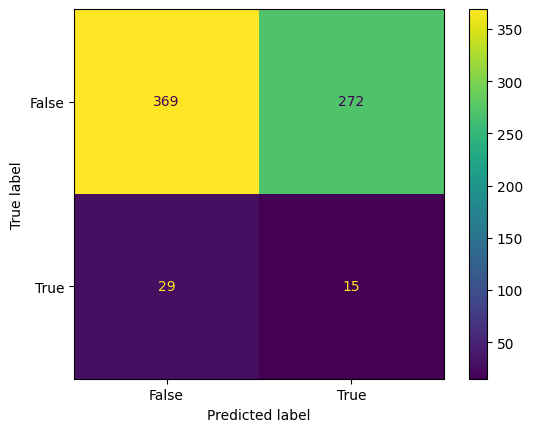

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, svc_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## RF

In [ ]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.49921996879875197
Accuracy score: 0.9343065693430657
F1 score: 0.0
